In [806]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings(action = 'ignore')

In [807]:
df = pd.read_pickle('df_title.pkl')

In [808]:
df

,song_num,date,title,label
0,26,2021-08-06,"라디, 싱글 '화풀어' 9일 발매…가창자는 민서",1.0
1,26,2021-09-01,"수현·온유, 정인 '오르막길'에 ""우리 무대 방송 안 나가도 돼"" (바라던 바다...",1.0
2,26,2021-10-11,"싱어송라이터 라디, 새 프로듀싱 싱글 'Easy love' 금일 발표",0.0
3,28,2021-06-05,"[N초점] ""그 시절 최애곡"" 여름 타고 온 리메이크 붐..왜?",1.0
4,28,2021-07-01,"""가수 활동 중단하겠다""던 라디, 프로듀싱 음원 '유' 발표",1.0
...,...,...,...,...
14308,1558,2021-09-21,"‘노래가 좋아’ 아웃렛, 3인 3색의 청량한 매력 ‘시선 강탈’",1.0
14309,1558,2021-09-21,아울렛 '노래가 좋아'서 3인 3색 청량 매력 발산,1.0
14310,1558,2021-09-21,"아웃렛(OUTLET), ‘노래가 좋아’ 평정한 3인 3색의 ‘청량한 매력’",1.0
14311,1558,2021-09-21,"‘노래가 좋아’ 아웃렛, 상큼한 추석 인사",1.0


In [809]:
# 데이터 크기 및 샘플 확인
print('train shape :', df.title.shape)
df.title.head()

train shape : (14313,)


0                         라디, 싱글 '화풀어' 9일 발매…가창자는 민서
1    수현·온유, 정인 '오르막길'에 "우리 무대 방송 안 나가도 돼" (바라던 바다...
2             싱어송라이터 라디, 새 프로듀싱 싱글 'Easy love' 금일 발표
3                [N초점] "그 시절 최애곡" 여름 타고 온 리메이크 붐..왜?
4                  "가수 활동 중단하겠다"던 라디, 프로듀싱 음원 '유' 발표
Name: title, dtype: object

In [810]:
# 레이블별 개수
cnt = df['label'].value_counts()
cnt

1.0    7205
0.0    7108
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

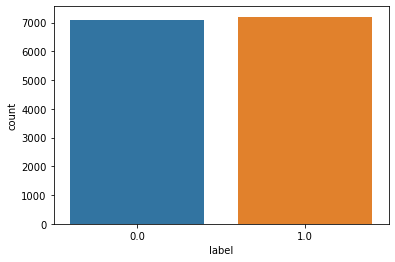

In [811]:
sns.countplot(df['label'])

In [812]:
# 결측치 확인
data.isnull().sum()

0

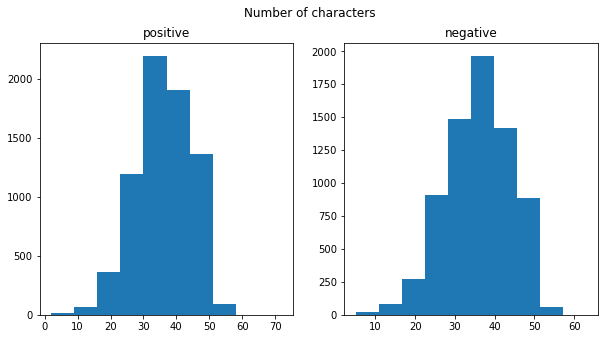

In [813]:
# 레이블별 텍스트 길이
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
data_len = df[df['label']==1]['title'].str.len()
ax1.hist(data_len)
ax1.set_title('positive')

data_len=df[df['label']==0]['title'].str.len()
ax2.hist(data_len)
ax2.set_title('negative')
fig.suptitle('Number of characters')
plt.show()

In [814]:
#mecab 임포트
from konlpy.tag import Mecab
mecab = Mecab(dicpath = r"C:\mecab\mecab-ko-dic")

In [816]:
#스페이스바 제외 특수 문자 제거
df['title'] = df['title'].str.replace("[^A-za-z가-힣ㄱ-ㅎㅏㅡㅣ ]","")
df['title'].head()

0                    라디 싱글 화풀어 일 발매가창자는 민서
1    수현온유 정인 오르막길에 우리 무대 방송 안 나가도 돼 바라던 바다
2      싱어송라이터 라디 새 프로듀싱 싱글 Easy love 금일 발표
3           [N초점] 그 시절 최애곡 여름 타고 온 리메이크 붐왜
4             가수 활동 중단하겠다던 라디 프로듀싱 음원 유 발표
Name: title, dtype: object

In [7]:
# stop_words=[]
# with open("한국어불용어100.txt","r",encoding='utf8') as f:
#   for i in f.readlines():
#      stop_words.append(i)

In [8]:
# temp = map(lambda x : x.split('\t')[0], stop_words)

In [872]:
# stop_words = list(temp)
# stop_words

In [817]:
#불용어 제거
def word_tokenization(text):
    stop_words = ['는','을','를','이','가','의','던','고','하','다','은','에','들','지','게','도']
    return [word for word in mecab.nouns(text) if word not in stop_words]
data = df['title'].apply(lambda x : word_tokenization(x))
data.head()

0               [라디, 싱글, 화, 일, 발매, 창자, 민서]
1       [수현, 온유, 정인, 오르막길, 우리, 무대, 방송, 바다]
2     [싱어, 송라이터, 라디, 프로, 듀, 싱, 싱글, 금일, 발표]
3                [초점, 시절, 애곡, 여름, 리메이크, 붐]
4    [가수, 활동, 중단, 라디, 프로, 듀, 싱, 음원, 유, 발표]
Name: title, dtype: object

In [818]:
# '[' 와 ']' 제거
def del_noise(text):
    noise = ['[',']']
    
    for word in text:
        if word in noise:
            text.remove(word)
    return text

data.apply(lambda x : del_noise(x))

0                   [라디, 싱글, 화, 일, 발매, 창자, 민서]
1           [수현, 온유, 정인, 오르막길, 우리, 무대, 방송, 바다]
2         [싱어, 송라이터, 라디, 프로, 듀, 싱, 싱글, 금일, 발표]
3                    [초점, 시절, 애곡, 여름, 리메이크, 붐]
4        [가수, 활동, 중단, 라디, 프로, 듀, 싱, 음원, 유, 발표]
                         ...                  
14308          [노래, 아웃렛, 인, 색, 청량, 매력, 시선, 강탈]
14309              [아울렛, 노래, 인, 색, 청량, 매력, 발산]
14310              [아웃렛, 노래, 평정, 인, 색, 청량, 매력]
14311                        [노래, 아웃렛, 추석, 인사]
14312         [송가, 내, 은인, 안성훈, 데뷔, 사연, 고백, 감동]
Name: title, Length: 14313, dtype: object

In [819]:
df['title'] = data
df

,song_num,date,title,label
0,26,2021-08-06,"[라디, 싱글, 화, 일, 발매, 창자, 민서]",1.0
1,26,2021-09-01,"[수현, 온유, 정인, 오르막길, 우리, 무대, 방송, 바다]",1.0
2,26,2021-10-11,"[싱어, 송라이터, 라디, 프로, 듀, 싱, 싱글, 금일, 발표]",0.0
3,28,2021-06-05,"[초점, 시절, 애곡, 여름, 리메이크, 붐]",1.0
4,28,2021-07-01,"[가수, 활동, 중단, 라디, 프로, 듀, 싱, 음원, 유, 발표]",1.0
...,...,...,...,...
14308,1558,2021-09-21,"[노래, 아웃렛, 인, 색, 청량, 매력, 시선, 강탈]",1.0
14309,1558,2021-09-21,"[아울렛, 노래, 인, 색, 청량, 매력, 발산]",1.0
14310,1558,2021-09-21,"[아웃렛, 노래, 평정, 인, 색, 청량, 매력]",1.0
14311,1558,2021-09-21,"[노래, 아웃렛, 추석, 인사]",1.0


In [820]:
#훈련, 검증 셋 분리
x_train, x_test, y_train, y_test = train_test_split(df['title'], df['label'], shuffle = True,
                                                   stratify = df['label'], random_state = 101)

In [821]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
print('총 단어 개수:', len(tokenizer.word_index))

def get_vocab_size(threshold):
    cnt = 0
    for x in tokenizer.word_counts.values():
        if x >= threshold:
            cnt += 1
    return cnt

vocab_size = get_vocab_size(1)
print('vocab_size :', vocab_size)

총 단어 개수: 12147
vocab_size : 12147


In [825]:
#정수 부여
oov_tok = '<OOV>'
vocab_size = vocab_size

tokenizer = Tokenizer(oov_token = oov_tok, num_words = vocab_size)
tokenizer.fit_on_texts(x_train)
print(tokenizer.word_index)
print('단어 사전 개수 :', len(tokenizer.word_counts))

{'<OOV>': 1, '일': 2, '년': 3, '위': 4, '사랑': 5, '공개': 6, '종합': 7, '만': 8, '오늘': 9, '발매': 10, '임영웅': 11, '월': 12, '가수': 13, '공식': 14, '팬': 15, '차트': 16, '원': 17, '곡': 18, '신곡': 19, '브레이브걸스': 20, '컴백': 21, '무대': 22, '것': 23, '빅마마': 24, '억': 25, '국민': 26, '콘서트': 27, '콜': 28, '뮤직': 29, '음악': 30, '데뷔': 31, '인터뷰': 32, '발표': 33, '팀': 34, '중': 35, '내': 36, '비투비': 37, '센타': 38, '나': 39, '등': 40, '백지영': 41, '거미': 42, '그룹': 43, '스타': 44, '노래': 45, '후': 46, '코로나': 47, '말': 48, '워너비': 49, '출격': 50, '유': 51, '출연': 52, '최고': 53, '라이브': 54, '개': 55, '주년': 56, '트': 57, '방탄소년단': 58, '리메이크': 59, '감성': 60, '차': 61, '번': 62, '개최': 63, '한국': 64, '앨범': 65, '확정': 66, '집': 67, '운세': 68, '수': 69, '우리': 70, '끝': 71, '아이돌': 72, '걸': 73, '전문': 74, '이찬원': 75, '돌': 76, '감독': 77, '아이유': 78, '눈물': 79, '저작': 80, '전': 81, '이영현': 82, '단독': 83, '영탁': 84, '예고': 85, '완전체': 86, '명': 87, '음원': 88, '때': 89, '탄소': 90, '추석': 91, '딸': 92, '시': 93, '급': 94, '별': 95, '황치열': 96, '가온': 97, '회': 98, '주': 99, '최초': 100, '출신': 101, '달': 1

In [826]:
#정수로 바꿈
print(x_train[:2])
train_sequences = tokenizer.texts_to_sequences(x_train)
valid_sequences = tokenizer.texts_to_sequences(x_test)
print(train_sequences[:2])

4059     [빅마마, 스테이, 씨, 커버, 증명, 귀환]
11476          [하이트진로, 사랑, 김장, 김치]
Name: title, dtype: object
[[24, 459, 161, 366, 935, 673], [6626, 5, 3820, 845]]


In [827]:
max_length = max(len(x) for x in train_sequences)
print('문장 최대 길이 :', max_length)

문장 최대 길이 : 16


In [828]:
# 문장 길이 맞추기 (패딩)
trunc_type = 'post'
padding_type = 'post'

train_padded = pad_sequences(train_sequences,
                            truncating = trunc_type,
                            padding = padding_type,
                            maxlen = max_length)

valid_padded = pad_sequences(valid_sequences,
                            truncating = trunc_type,
                            padding = padding_type,
                            maxlen = max_length)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
print('샘플 : ',train_padded[:1])

샘플 :  [[ 24 459 161 366 935 673   0   0   0   0   0   0   0   0   0   0]]


In [830]:
#워드투벡 임베딩 레이어 생성을 위한 article_title 데이터 로드
import json
with open('./article_title3.json', 'r',encoding = 'utf8') as f:
    json_data = json.load(f)

corp = []
for i in json_data:
    corp.append(i['article_title'])

for_train=pd.DataFrame(corp,columns=['title'])
for_train['title'] = for_train['title'].str.replace("[^A-za-z가-힣ㄱ-ㅎㅏㅡㅣ ]","")
for_train['title'].head()

0      싱어송라이터 라디 새 프로듀싱 싱글 Easy love 금일 발표
1    수현온유 정인 오르막길에 우리 무대 방송 안 나가도 돼 바라던 바다
2                    라디 싱글 화풀어 일 발매가창자는 민서
3                 쏠 복면가왕 출연 소감 첫 예능 굉장히 떨려
4            쏠 출연소감 첫 예능 복면가왕 굉장히 떨려 눈물날 뻔
Name: title, dtype: object

In [832]:
data2 = for_train['title'].apply(lambda x : word_tokenization(x))
data2.head()

0    [싱어, 송라이터, 라디, 프로, 듀, 싱, 싱글, 금일, 발표]
1      [수현, 온유, 정인, 오르막길, 우리, 무대, 방송, 바다]
2              [라디, 싱글, 화, 일, 발매, 창자, 민서]
3                 [쏠, 복면, 가왕, 출연, 소감, 예능]
4       [쏠, 출연, 소감, 예능, 복면, 가왕, 눈물, 날, 뻔]
Name: title, dtype: object

In [834]:
#워드투벡 단어사전 생성
from gensim.models.word2vec import Word2Vec

wv = Word2Vec( sentences=data2, vector_size = 100, epochs= 100,window = 5, workers =4, min_count =1, sg =1)

In [835]:
# from gensim.models.word2vec import Word2Vec

# wv = Word2Vec( sentences=x_train, vector_size = 100, epochs= 100,window = 5, workers =4, min_count =1, sg =1)

In [865]:
# 임베딩 레이어에 주입할 임베딩 매트릭스 생성
# 단어 집합 크기의 행과 300개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
embedding_matrix = np.zeros((vocab_size+2, 100))
np.shape(embedding_matrix)

(12149, 100)

In [866]:
def get_vector(word):
    if word in wv.wv:
        return wv.wv[word]
    else:
        return None

In [867]:
for word, index in tokenizer.word_index.items():
    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = get_vector(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

In [868]:
print('단어 음악의 정수 인덱스 :', tokenizer.word_index['음악'])

단어 음악의 정수 인덱스 : 30


In [870]:
# 인덱스 같은지 확인
wv.wv['음악'] == embedding_matrix[30]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [871]:
# 모델 설계
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, Dropout, BatchNormalization, ReLU, LeakyReLU

 

def create_model():
    model = Sequential([
        Embedding(vocab_size+2, 100,input_length=16, weights=[embedding_matrix], trainable=False),
        Bidirectional(LSTM(32,return_sequences=True, recurrent_dropout = 0.2)),
#         Dense(64),
#         BatchNormalization(),
#         ReLU(),
        Dropout(0.3),
        Dense(64),
        BatchNormalization(),
        ReLU(),
        Dropout(0.3),
        Dense(64),
        BatchNormalization(),
        ReLU(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_106 (Embedding)    (None, 16, 100)           1214900   
_________________________________________________________________
bidirectional_104 (Bidirecti (None, 16, 64)            34048     
_________________________________________________________________
dropout_273 (Dropout)        (None, 16, 64)            0         
_________________________________________________________________
dense_393 (Dense)            (None, 16, 64)            4160      
_________________________________________________________________
batch_normalization_272 (Bat (None, 16, 64)            256       
_________________________________________________________________
re_lu_221 (ReLU)             (None, 16, 64)            0         
_________________________________________________________________
dropout_274 (Dropout)        (None, 16, 64)         

In [858]:
checkpoint_path = 'best_performed_model.ckpt'
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                               save_weights_only = True,
                                               save_best_only = True,
                                               monitor = 'val_loss',
                                               verbose = 1)

In [859]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience =2)

history = model.fit(train_padded, y_train,
                   validation_data = (valid_padded, y_test),
                   callbacks=[early_stop, checkpoint],
                   batch_size=128, epochs=20, verbose=2)

Epoch 1/20

Epoch 00001: val_loss improved from inf to 0.69418, saving model to best_performed_model.ckpt
84/84 - 3s - loss: 0.7460 - accuracy: 0.5049 - val_loss: 0.6942 - val_accuracy: 0.5037
Epoch 2/20

Epoch 00002: val_loss improved from 0.69418 to 0.69371, saving model to best_performed_model.ckpt
84/84 - 3s - loss: 0.7139 - accuracy: 0.5074 - val_loss: 0.6937 - val_accuracy: 0.5088
Epoch 3/20

Epoch 00003: val_loss improved from 0.69371 to 0.68866, saving model to best_performed_model.ckpt
84/84 - 3s - loss: 0.7001 - accuracy: 0.5254 - val_loss: 0.6887 - val_accuracy: 0.5386
Epoch 4/20

Epoch 00004: val_loss improved from 0.68866 to 0.68088, saving model to best_performed_model.ckpt
84/84 - 3s - loss: 0.6845 - accuracy: 0.5610 - val_loss: 0.6809 - val_accuracy: 0.5662
Epoch 5/20

Epoch 00005: val_loss improved from 0.68088 to 0.66372, saving model to best_performed_model.ckpt
84/84 - 3s - loss: 0.6621 - accuracy: 0.6008 - val_loss: 0.6637 - val_accuracy: 0.5922
Epoch 6/20

Epoch 0

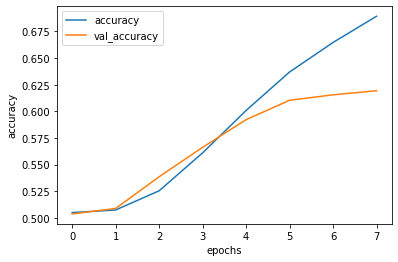

In [862]:
# 훈련셋 검증셋 accuracy 비교
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric],'')
    plt.xlabel('epochs')
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()
plot_graphs(history, 'accuracy')

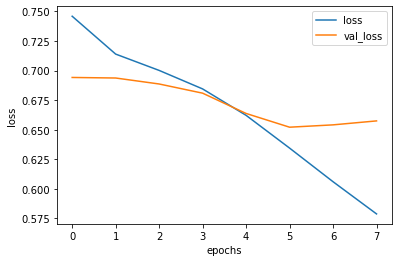

In [863]:
# 훈련셋 검증셋 loss 비교
plot_graphs(history, 'loss')

### fasttext pre-trained 데이터 사용

In [555]:
from gensim import models

ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin')

In [563]:
ko_model.wv.most_similar("뮤직카우")

[('수사하였다', 0.5473684072494507),
 ('선금으로', 0.5044214725494385),
 ('수사중이다', 0.5015312433242798),
 ('기소유예처분을', 0.4754725694656372),
 ('수사하였으나', 0.4627087116241455),
 ('정직처분을', 0.4576045870780945),
 ('입건해', 0.4500114619731903),
 ('현대차로부터', 0.4496087431907654),
 ('경찰조사를', 0.44953498244285583),
 ('청구했고', 0.4484669864177704)]